# **Welcome to our project**

**Adi Dereviani**\
**Liron Levi**

In [1]:
from IPython.display import Image

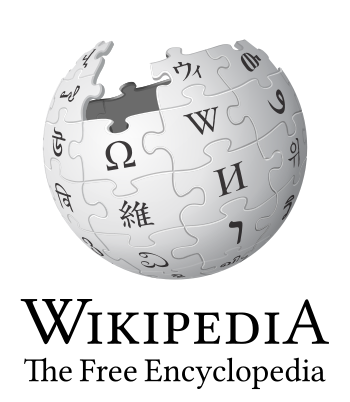

In [2]:
Image(filename='WIKI.png')

# **Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **Check out the Data**

In [4]:
WikiData = pd.read_csv('WikiDataSet.csv')

In [5]:
WikiData

,Page Title,URL,Num Of Pictures,Num Of Languages,Num Of References,Num Of Contents,Num Of Tables,Num Of Categories,Num Of Redirects,Views In 30 Last Days,Avg Views Per Day,Total Views,Num Of Edits
0,Madrid Motor Show,https://en.wikipedia.org/wiki/Madrid_Motor_Show,1,2,1,6,0,5,0,27,5.738306,13617,25
1,The Two Crusaders,https://en.wikipedia.org/wiki/The_Two_Crusaders,2,3,3,5,0,13,2,77,6.503582,15433,18
2,Sligo,https://en.wikipedia.org/wiki/Sligo,22,52,56,18,1,6,10,"9,282",388.820059,922670,"2,429"
3,Sam Craigie,https://en.wikipedia.org/wiki/Sam_Craigie,1,5,25,6,4,4,0,"1,312",37.186262,88243,309
4,Piet Rinke,https://en.wikipedia.org/wiki/Piet_Rinke,0,2,1,5,0,9,1,29,3.359461,7972,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4576,September Affair,https://en.wikipedia.org/wiki/September_Affair,1,7,4,6,0,14,0,776,34.358618,81533,71
4577,Sunnyside station (Toronto),https://en.wikipedia.org/wiki/Sunnyside_statio...,7,0,0,6,1,8,4,26,2.537716,6022,64
4578,Kentucky Revised Statutes,https://en.wikipedia.org/wiki/Kentucky_Revised...,1,1,0,0,0,3,8,149,15.221660,36121,18
4579,Vérteskethely,https://en.wikipedia.org/wiki/V%C3%A9rteskethely,5,15,0,0,0,2,1,9,2.284029,5420,23


In [6]:
WikiData.shape # Number of rows and columns

(4581, 13)

# **Preproccess**

### We are dropping the columns that we are not going to use in our training model.

In [7]:
WikiData.drop(['Page Title','URL'],axis=1,inplace=True)

In [8]:
WikiData.head()

,Num Of Pictures,Num Of Languages,Num Of References,Num Of Contents,Num Of Tables,Num Of Categories,Num Of Redirects,Views In 30 Last Days,Avg Views Per Day,Total Views,Num Of Edits
0,1,2,1,6,0,5,0,27,5.738306,13617,25
1,2,3,3,5,0,13,2,77,6.503582,15433,18
2,22,52,56,18,1,6,10,"9,282",388.820059,922670,"2,429"
3,1,5,25,6,4,4,0,"1,312",37.186262,88243,309
4,0,2,1,5,0,9,1,29,3.359461,7972,38


### Both lines have been removed!

## **Repair numeric missing values**

In [9]:
WikiData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4581 entries, 0 to 4580
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Num Of Pictures        4581 non-null   int64  
 1   Num Of Languages       4581 non-null   int64  
 2   Num Of References      4581 non-null   int64  
 3   Num Of Contents        4581 non-null   int64  
 4   Num Of Tables          4581 non-null   int64  
 5   Num Of Categories      4581 non-null   int64  
 6   Num Of Redirects       4581 non-null   int64  
 7   Views In 30 Last Days  4581 non-null   object 
 8   Avg Views Per Day      4581 non-null   float64
 9   Total Views            4581 non-null   int64  
 10  Num Of Edits           4581 non-null   object 
dtypes: float64(1), int64(8), object(2)
memory usage: 393.8+ KB


### Convert numerical objects to int64

In [10]:
WikiData['Num Of Edits'] = pd.to_numeric(WikiData['Num Of Edits'], errors='coerce').fillna(0).astype(np.int64)
WikiData['Views In 30 Last Days'] = pd.to_numeric(WikiData['Views In 30 Last Days'], errors='coerce').fillna(0).astype(np.int64)

In [11]:
WikiData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4581 entries, 0 to 4580
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Num Of Pictures        4581 non-null   int64  
 1   Num Of Languages       4581 non-null   int64  
 2   Num Of References      4581 non-null   int64  
 3   Num Of Contents        4581 non-null   int64  
 4   Num Of Tables          4581 non-null   int64  
 5   Num Of Categories      4581 non-null   int64  
 6   Num Of Redirects       4581 non-null   int64  
 7   Views In 30 Last Days  4581 non-null   int64  
 8   Avg Views Per Day      4581 non-null   float64
 9   Total Views            4581 non-null   int64  
 10  Num Of Edits           4581 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 393.8 KB


### We did it!

In [12]:
WikiData.describe()

,Num Of Pictures,Num Of Languages,Num Of References,Num Of Contents,Num Of Tables,Num Of Categories,Num Of Redirects,Views In 30 Last Days,Avg Views Per Day,Total Views,Num Of Edits
count,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4.581000e+03,4581.000000
mean,2.796333,4.378738,8.465401,2.941061,0.676053,5.862694,1.670814,112.920105,37.732337,8.953884e+04,74.793931
std,8.935149,9.089053,22.634989,3.405752,3.168047,4.697733,4.399474,187.424563,217.353670,5.157803e+05,121.068873
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000421,1.000000e+00,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,10.000000,2.163928,5.135000e+03,16.000000
50%,2.000000,1.000000,3.000000,3.000000,0.000000,4.000000,1.000000,33.000000,4.499368,1.067700e+04,34.000000
75%,3.000000,4.000000,8.000000,5.000000,0.000000,8.000000,2.000000,117.000000,12.948167,3.072600e+04,76.000000
max,298.000000,150.000000,753.000000,52.000000,120.000000,58.000000,128.000000,996.000000,7555.876106,1.793009e+07,994.000000


In [13]:
WikiData.columns

Index(['Num Of Pictures', 'Num Of Languages', 'Num Of References',
       'Num Of Contents', 'Num Of Tables', 'Num Of Categories',
       'Num Of Redirects', 'Views In 30 Last Days', 'Avg Views Per Day',
       'Total Views', 'Num Of Edits'],
      dtype='object')

## **Exploratory Data Analysis**
### Missing Data

In [14]:
WikiData.isnull()

,Num Of Pictures,Num Of Languages,Num Of References,Num Of Contents,Num Of Tables,Num Of Categories,Num Of Redirects,Views In 30 Last Days,Avg Views Per Day,Total Views,Num Of Edits
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4576,False,False,False,False,False,False,False,False,False,False,False
4577,False,False,False,False,False,False,False,False,False,False,False
4578,False,False,False,False,False,False,False,False,False,False,False
4579,False,False,False,False,False,False,False,False,False,False,False


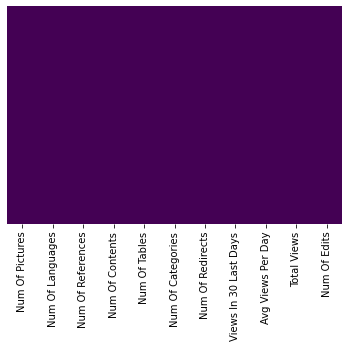

In [15]:
sns.heatmap(WikiData.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### As we can see in our heat map, we have no null values.

# **EDA**

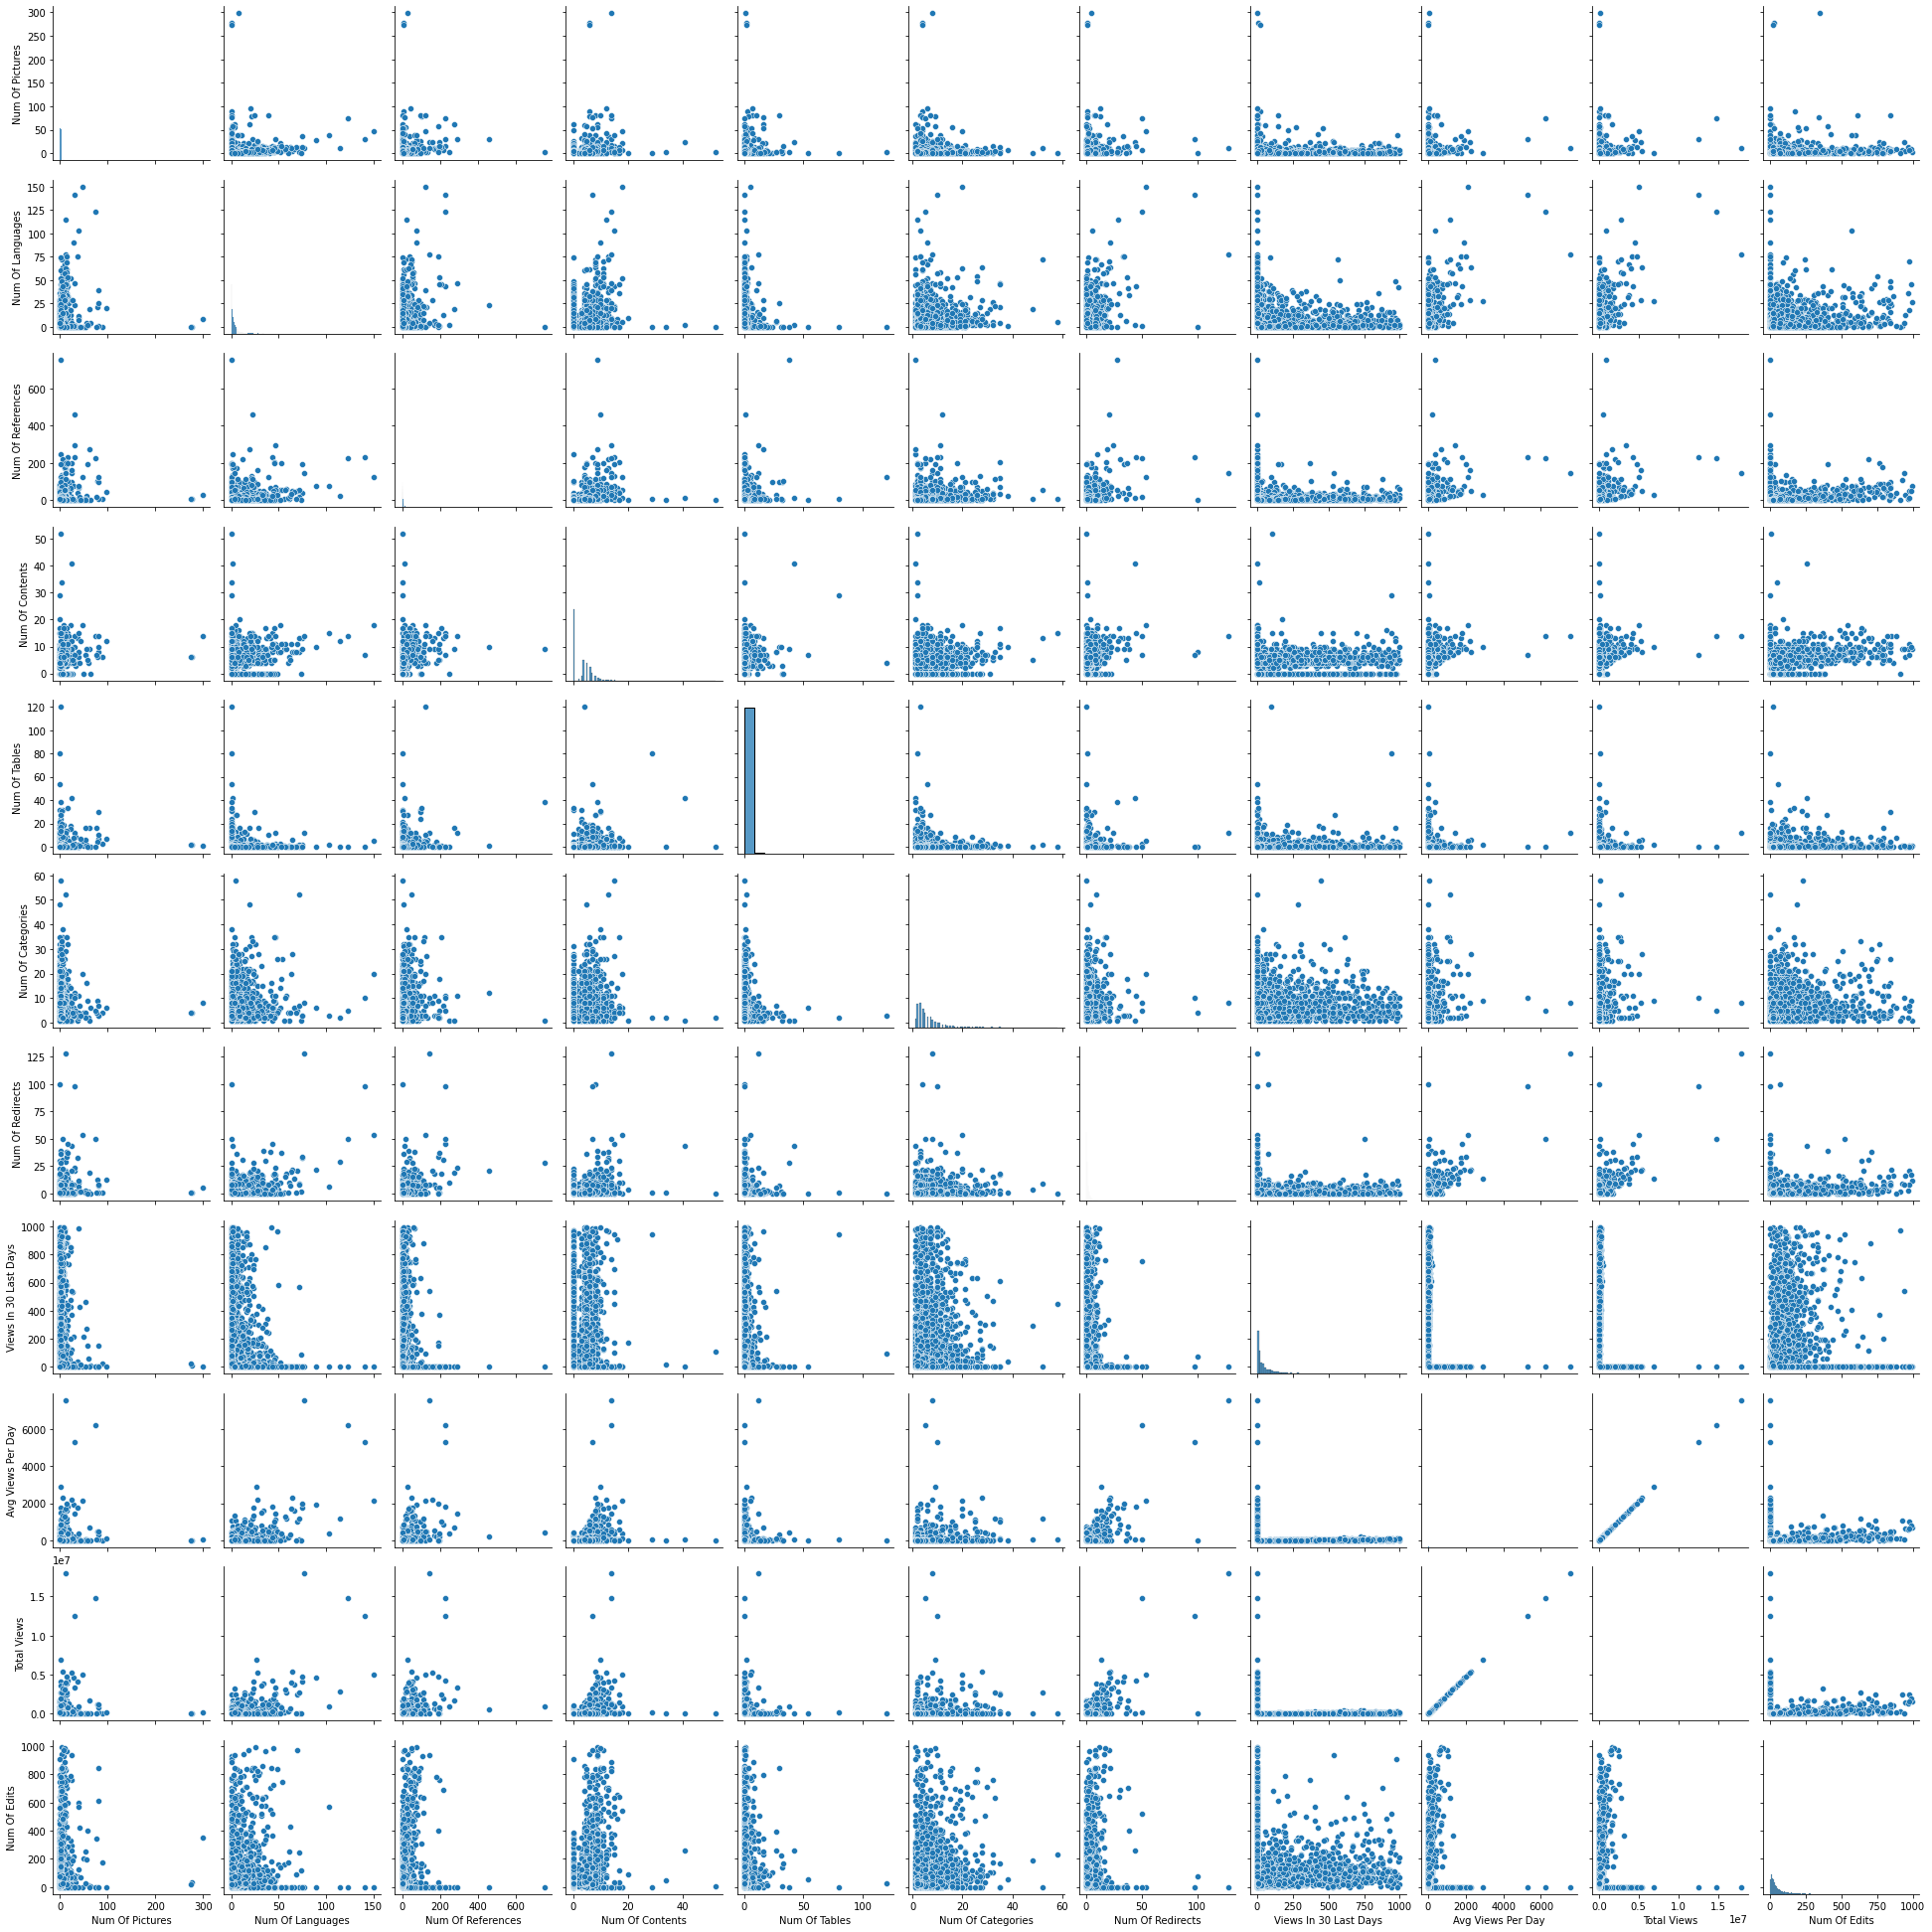

In [16]:
sns.pairplot(WikiData) #The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

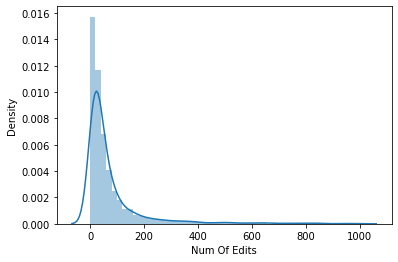

In [17]:
sns.distplot(WikiData['Num Of Edits'])

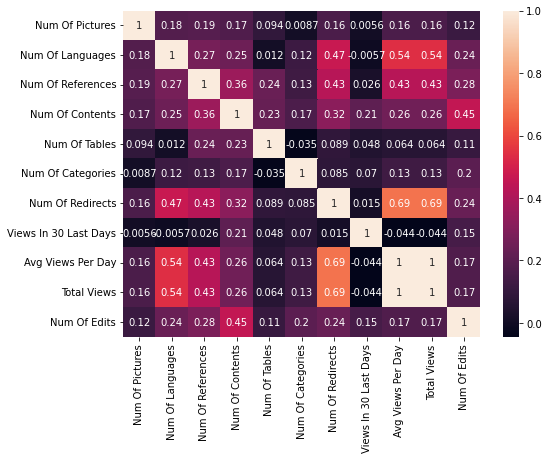

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(WikiData.corr(), annot=True)

 ### There is a perfect correlation between: "Avg Views Per Day", "Total Views".

### Since "Total Views" label and "Avg Views Per Day" is two of the X features, we will get a perfect model, therefore we delete the "Avg Views Per Day" column.

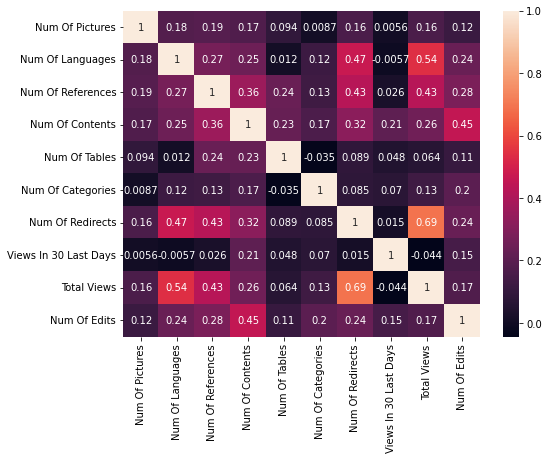

In [19]:
plt.figure(figsize=(8, 6))
WikiData_processed = WikiData.copy() # Made a copy to Dataset
WikiData_processed.drop('Avg Views Per Day', inplace=True, axis=1)
sns.heatmap(WikiData_processed.corr(), annot=True)

### This matrix results make sense, for example: there is high correlation between the "Num Of Languages" and the "Total Views" which might suggest that the "Total Views" increased as the page has been translated to more languages, which is also logical.

In [20]:
WikiData['Num Of Languages'].value_counts()[:].sort_index(ascending = True)

0      1534
1       760
2       513
3       356
4       282
       ... 
103       1
115       1
123       1
141       1
150       1
Name: Num Of Languages, Length: 74, dtype: int64

### Also, it can be seen that most of the pages are not translated into other languages.

# **Model - Training a Linear Regression Model**
### X and y arrays

In [21]:
WikiData_processed.columns

Index(['Num Of Pictures', 'Num Of Languages', 'Num Of References',
       'Num Of Contents', 'Num Of Tables', 'Num Of Categories',
       'Num Of Redirects', 'Views In 30 Last Days', 'Total Views',
       'Num Of Edits'],
      dtype='object')

In [22]:
X = WikiData_processed[['Num Of Pictures', 'Num Of Languages',
       'Num Of References', 'Num Of Contents', 'Num Of Tables',
       'Num Of Categories', 'Num Of Redirects', 'Total Views',
       'Views In 30 Last Days']] #Features

y = WikiData_processed['Num Of Edits'] #Our target values ​​- what we are trying to predict

## **Split dataset to train and test**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## **Creating and Training the Model**

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train,y_train)

LinearRegression()

## **Model Evaluation**

In [26]:
print(lr.intercept_)

1.1755866451643584


In [27]:
lr.coef_

array([ 3.79099637e-01,  1.78381954e+00,  4.73767976e-01,  1.11459401e+01,
       -1.00259280e+00,  3.32375722e+00,  1.89283104e+00, -2.12731413e-06,
        4.85382103e-02])

In [28]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Num Of Pictures,0.379100
Num Of Languages,1.783820
Num Of References,0.473768
Num Of Contents,11.145940
Num Of Tables,-1.002593
Num Of Categories,3.323757
Num Of Redirects,1.892831
Total Views,-0.000002
Views In 30 Last Days,0.048538


## **Predictions from our Model**

In [29]:
predictions = lr.predict(X_test)

### We want to know how far off are the predictions from the tests edits the actual edits.

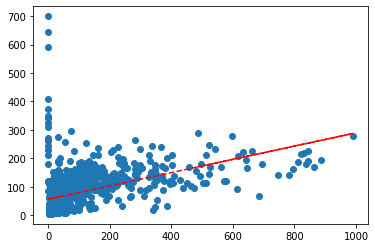

In [30]:
plt.scatter(y_test,predictions)
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"r--")

plt.show()

## **Residual Histogram**

Text(0.5, 1.0, 'Residual Prediction Histogram')

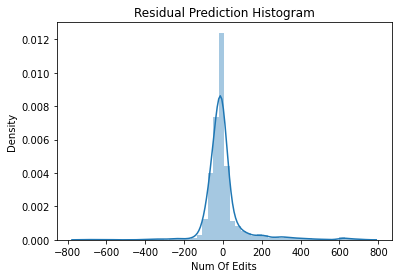

In [31]:
sns.distplot((y_test-predictions),bins=50); # The goal: need to be around zero
plt.title('Residual Prediction Histogram')

### As we can see, the Residual Prediction Histogram mean is around zero, which suggest the model manage to predict accurately.

## **Regression Evaluation Metrics**

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 55.94397900982906
MSE: 12242.997372919934
RMSE: 110.64807893912996


# **Model - Training a Logistic Regression Model**

### First, we check what the average of our prediction value is:

In [33]:
WikiData_processed['Num Of Edits'].mean()

74.79393145601396

## **Preproccess**

### For the y label any value above the mean (75) will get 1 otherwise, 0.

In [34]:
WikiData_processed['Num Of Edits'] = WikiData_processed['Num Of Edits'].apply(lambda x: 1 if x>WikiData_processed['Num Of Edits'].mean() else 0) 

In [35]:
WikiData_processed['Num Of Edits'].value_counts()

0    3413
1    1168
Name: Num Of Edits, dtype: int64

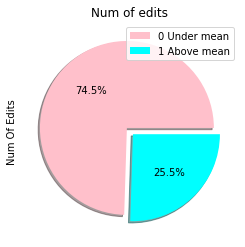

In [36]:
labels = ['0 Under mean', '1 Above mean']
WikiData_processed['Num Of Edits'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05], colors = ("pink", "cyan"), legend=True, title='Num of edits', labeldistance=None) # Count the number of 1 and the number of 0
plt.legend(labels)

### As we can see, most of the observations are below the "Numbers Of Edits" mean.

# **EDA**

Text(0.5, 1.0, 'Num Of Edits Distribution')

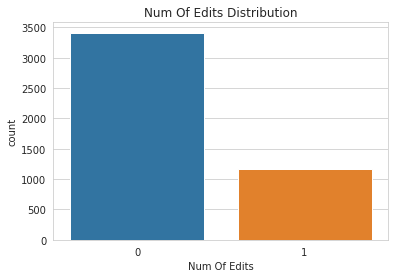

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='Num Of Edits',data=WikiData_processed)
plt.title('Num Of Edits Distribution')

Text(0.5, 1.0, 'Num Of Languages Distribution')

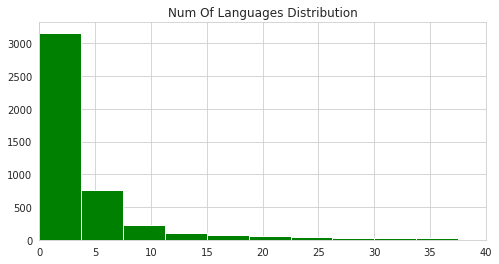

In [38]:
WikiData_processed['Num Of Languages'].hist(color='green',bins=40,figsize=(8,4))
plt.xlim(0, 40)
plt.title('Num Of Languages Distribution')

### We will check if there is any more missing data with heatmap:

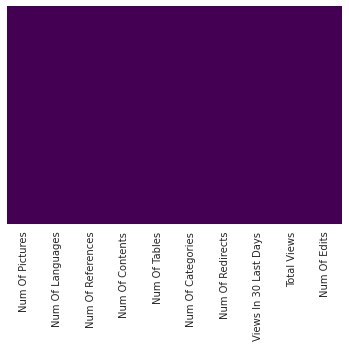

In [39]:
sns.heatmap(WikiData_processed.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### looking great!

## **Training and Predicting**

### Split dataset to train and test

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Train the classification model

In [41]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [42]:
predictions = log_model.predict(X_test)

## **Model Evaluation**

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1031
           1       0.47      0.23      0.31       344

    accuracy                           0.74      1375
   macro avg       0.62      0.57      0.57      1375
weighted avg       0.70      0.74      0.71      1375



In [44]:
confusion_matrix(y_test, predictions) # The actual confusin matrix to evalute the model

array([[943,  88],
       [266,  78]])

# **KNN**

## Standardize the Variables

### Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
WikiData_processed.head()

,Num Of Pictures,Num Of Languages,Num Of References,Num Of Contents,Num Of Tables,Num Of Categories,Num Of Redirects,Views In 30 Last Days,Total Views,Num Of Edits
0,1,2,1,6,0,5,0,27,13617,0
1,2,3,3,5,0,13,2,77,15433,0
2,22,52,56,18,1,6,10,0,922670,0
3,1,5,25,6,4,4,0,0,88243,1
4,0,2,1,5,0,9,1,29,7972,0


In [47]:
scaler = StandardScaler() #removes the mean and scales each feature to unit variance

In [48]:
scaler.fit(WikiData_processed.drop('Num Of Edits',axis=1))

StandardScaler()

In [49]:
scaled_features = scaler.transform(WikiData_processed.drop('Num Of Edits',axis=1))

In [50]:
WikiData_scaled = pd.DataFrame(scaled_features,columns=WikiData_processed.columns[:-1]) #removed the last column 'Num Of Edits' = y

In [51]:
WikiData_scaled.head()

,Num Of Pictures,Num Of Languages,Num Of References,Num Of Contents,Num Of Tables,Num Of Categories,Num Of Redirects,Views In 30 Last Days,Total Views
0,-0.201063,-0.261743,-0.329853,0.898267,-0.213421,-0.183660,-0.379817,-0.458475,-0.147214
1,-0.089133,-0.151709,-0.241484,0.604614,-0.213421,1.519474,0.074832,-0.191672,-0.143693
2,2.149462,5.239980,2.100279,4.422102,0.102266,0.029231,1.893430,-0.602549,1.615459
3,-0.201063,0.068360,0.730568,0.898267,1.049325,-0.396552,-0.379817,-0.602549,-0.002513
4,-0.312993,-0.261743,-0.329853,0.604614,-0.213421,0.667907,-0.152493,-0.447803,-0.158160


## Using KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier(n_neighbors=1)

In [54]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [55]:
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model.

In [56]:
print(confusion_matrix(y_test,pred))

[[877 154]
 [152 192]]


In [57]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1031
           1       0.55      0.56      0.56       344

    accuracy                           0.78      1375
   macro avg       0.70      0.70      0.70      1375
weighted avg       0.78      0.78      0.78      1375



## Choosing a K Value
Now we are going to pick a good K Value:

In [58]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

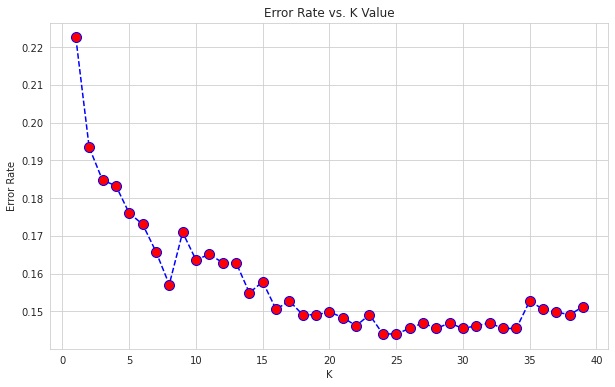

In [59]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Here we can see that after arouns K>24 the error rate just tends to hover around 0.15-0.10

In [60]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[877 154]
 [152 192]]


              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1031
           1       0.55      0.56      0.56       344

    accuracy                           0.78      1375
   macro avg       0.70      0.70      0.70      1375
weighted avg       0.78      0.78      0.78      1375



In [61]:
# NOW WITH K=24
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=24')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=24


[[953  78]
 [127 217]]


              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1031
           1       0.74      0.63      0.68       344

    accuracy                           0.85      1375
   macro avg       0.81      0.78      0.79      1375
weighted avg       0.85      0.85      0.85      1375



### We were able to squeeze some more performance out of our model by tuning to a better K value!

# **References**

### Here is a list of references we've used during the project:

https://towardsdatascience.com/pie-charts-in-python-302de204966c

https://pandas.pydata.org/pandas-docs/version/1.3.1/user_guide/visualization.html

https://stackoverflow.com/questions/62617348/how-to-insert-image-from-url-in-jupyter-notebook-markdown

https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/

https://www.udemy.com/course/complete-python-bootcamp/

# **Thank you !**